In [1]:
import numpy as np
import pandas as pd

## Pre-process and data loading

In [2]:
# dataset has 64*64= 4096 columns for the image and last column (named as target) as lable of the person whose image is processed

df = pd.read_csv('https://raw.githubusercontent.com/Shivansh1910/ds-project/master/face-data.csv')

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [4]:
df.shape

(400, 4097)

In [5]:
label = df['target']
pixels = df.drop('target',axis=1)
pixels.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554


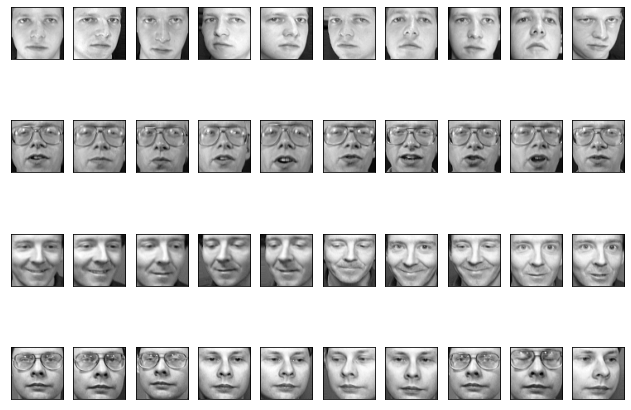

In [6]:
# original images
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 10, figsize=(11, 8),subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
plt.show()

## Spliting dataset into training and testing

In [7]:
from sklearn.model_selection import train_test_split
# split 75% of data as training data
x_train, x_test, y_train, y_test = train_test_split(pixels, label,train_size = 0.75 ,random_state=2)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_train)
# print(y_train)

[[ 1.68833103  1.41035342  1.33762719 ... -0.90231877 -0.74057299
  -1.12454843]
 [-0.62496893 -1.02624733 -1.23105856 ... -1.03670351 -0.89830152
  -0.38262927]
 [ 0.78115439  0.63409112  0.55216133 ... -0.52156202 -0.44764858
  -0.45218421]
 ...
 [-0.03530436  0.48315136  0.74322048 ...  0.01597685  0.04806964
   0.28973484]
 [ 1.48421624  1.30253922  1.18902564 ... -1.12629329 -1.10109532
  -1.12454843]
 [-1.2146336  -1.06937299 -1.37966021 ...  1.67338859 -0.67297508
  -0.79995883]]


In [9]:
print(x_train.shape)
print(y_train.shape)

(300, 4096)
(300,)


## PCA

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
x_train = pca.fit_transform(x_train)

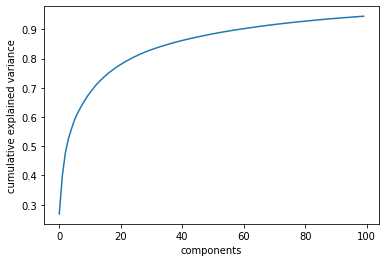

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('components')
plt.ylabel('cumulative explained variance');
plt.show()

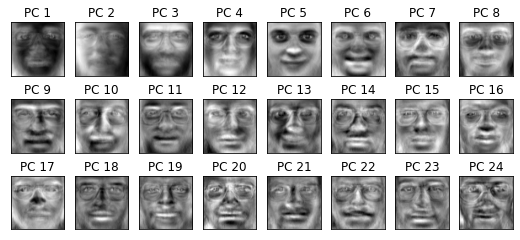

In [12]:
# images due to dimention reduction
fig, axes = plt.subplots(3, 8, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
    ax.set_title("PC " + str(i+1))
plt.show()

## fit training data

In [13]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1000, gamma = 0.001)
clf= clf.fit(x_train,y_train)

In [14]:
x_test_pca = pca.transform(x_test)
y_predict =  clf.predict(x_test_pca)

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_predict)
print(accuracy)

0.9


In [16]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         3
           2       1.00      0.50      0.67         4
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      0.80      0.89         5
           7       0.67      1.00      0.80         2
           8       0.50      1.00      0.67         1
           9       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         2
          12       0.25      1.00      0.40         1
          14       1.00      0.75      0.86         4
          15       1.00      0.67      0.80         3
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         4
          18       1.00    